In [1]:
#packages
import pandas as pd
import numpy as np
from plotnine import *

In [54]:
df = pd.read_csv("/Users/conniechou/Library/CloudStorage/OneDrive-Personal/Connie/Homework/GSB 521 Pierce /Cloud-Computing-Projects/project2/sample_df (2).csv")
df.head()

,Unnamed: 0,timestamp,user,coordinate,pixel_color
0,0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [3]:
len(df)

2644514

In [4]:
#drop extra index column and covert timestamp column into datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [5]:
df.dtypes

timestamp      datetime64[ns, UTC]
user                        object
coordinate                  object
pixel_color                 object
dtype: object

In [6]:
df.nunique()

timestamp      2644514
user           1549818
coordinate     1538041
pixel_color         32
dtype: int64

In [7]:
# Analyzing the dataset for potential signs of bot activity

# top 10 users
user_activity = df[["user", "timestamp"]]
top10_users = user_activity.groupby("user").count().sort_values(by="timestamp", ascending=False).head(10)

#turn group by into dataframe
top10_users_df = pd.DataFrame(top10_users).reset_index()
top10_users_df["user"] = top10_users_df["user"].str.extract(r'^(.{8})')
top10_users_df = top10_users_df.rename(columns={"timestamp": "count of activity"})
top10_users_df


,user,count of activity
0,kN91vAk/,147
1,oCgWHk6C,126
2,/YNNvIEr,98
3,tFRL97+0,95
4,ay5U7RmL,86
5,bRwFe1qJ,73
6,YuV9dD2B,70
7,gAjvJgod,63
8,/XIhfEKO,60
9,UJgZrjNi,59


In [8]:
# Checking for rapid succession of actions by looking at timestamp differences
user_timestamp = df.sort_values(by="timestamp")
user_timestamp['time_diff'] = user_timestamp['timestamp'].diff().dt.total_seconds().fillna(0)
user_timestamp["user"] = user_timestamp["user"].str.extract(r'^(.{8})')

# # Average time difference for changes made by the top 10 most active users
avg_time_diff_top_users = user_timestamp[user_timestamp['user'].isin(top10_users_df["user"])].groupby('user')['time_diff'].mean()


In [9]:
avg_time_diff_top_users_df = pd.DataFrame(avg_time_diff_top_users).reset_index().sort_values(by="time_diff", ascending = True)
avg_time_diff_top_users_df

,user,time_diff
2,UJgZrjNi,0.140627
1,/YNNvIEr,0.144306
8,oCgWHk6C,0.167484
4,ay5U7RmL,0.180523
0,/XIhfEKO,0.182117
9,tFRL97+0,0.238389
6,gAjvJgod,0.246619
7,kN91vAk/,0.250177
5,bRwFe1qJ,0.264890
3,YuV9dD2B,0.271429


In [10]:
#round time_diff
avg_time_diff_top_users_df["time_diff"] = avg_time_diff_top_users_df["time_diff"].round(3)
avg_time_diff_top_users_df

,user,time_diff
2,UJgZrjNi,0.141
1,/YNNvIEr,0.144
8,oCgWHk6C,0.167
4,ay5U7RmL,0.181
0,/XIhfEKO,0.182
9,tFRL97+0,0.238
6,gAjvJgod,0.247
7,kN91vAk/,0.250
5,bRwFe1qJ,0.265
3,YuV9dD2B,0.271


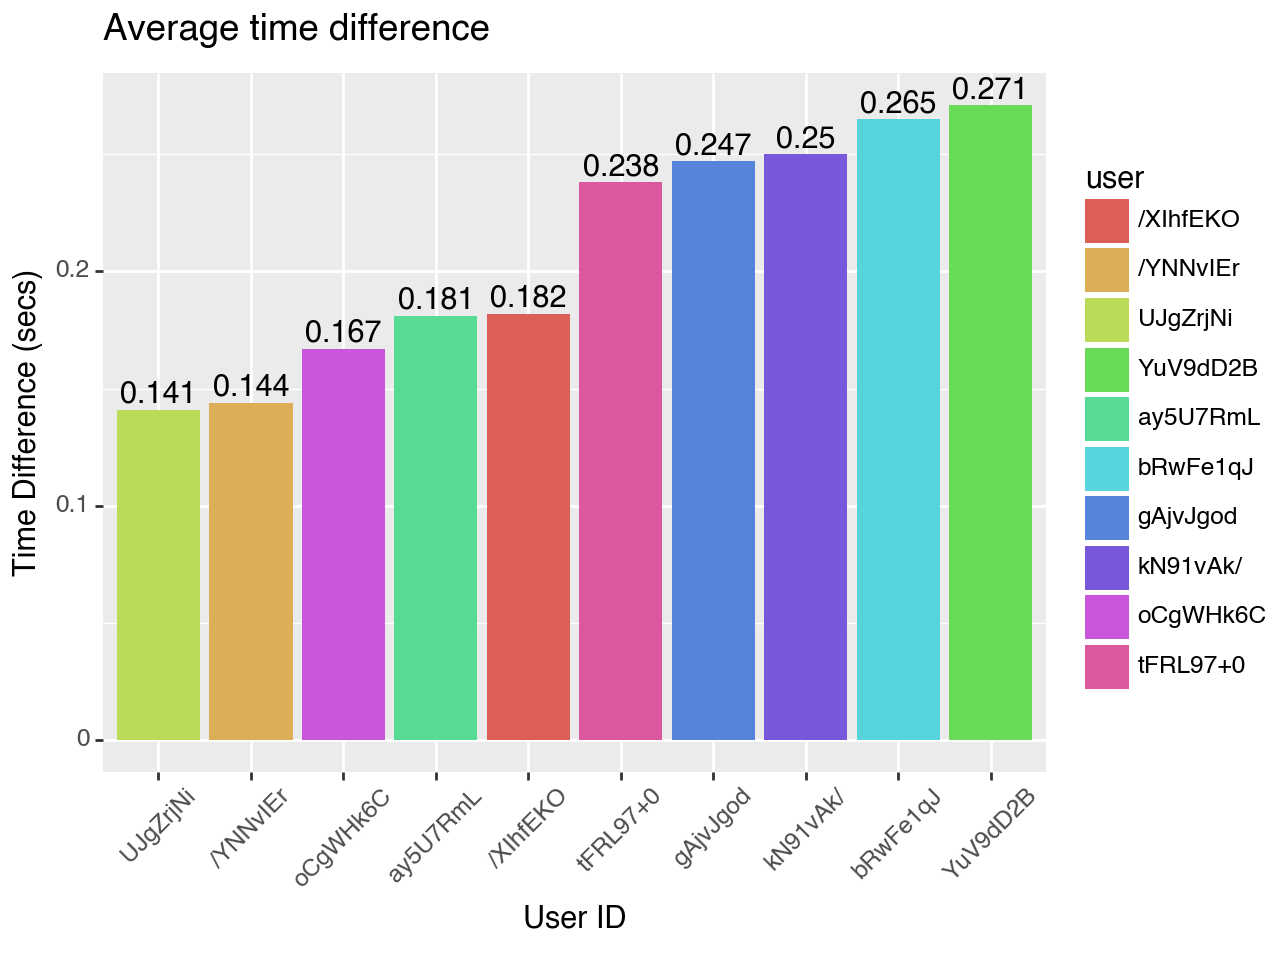

<Figure Size: (640 x 480)>

In [11]:
#plot of user and time_diff
ordered_categories1 = avg_time_diff_top_users_df["user"]
(ggplot(avg_time_diff_top_users_df, aes(x="user", y="time_diff", fill = "user"))
 + geom_col()
 + labs(title="Average time difference", x = "User ID", y = "Time Difference (secs)")
  + scale_x_discrete(limits=ordered_categories1)
  + geom_text(aes(label='time_diff'), va='bottom')
 + theme(axis_text_x=element_text(angle=45))
)

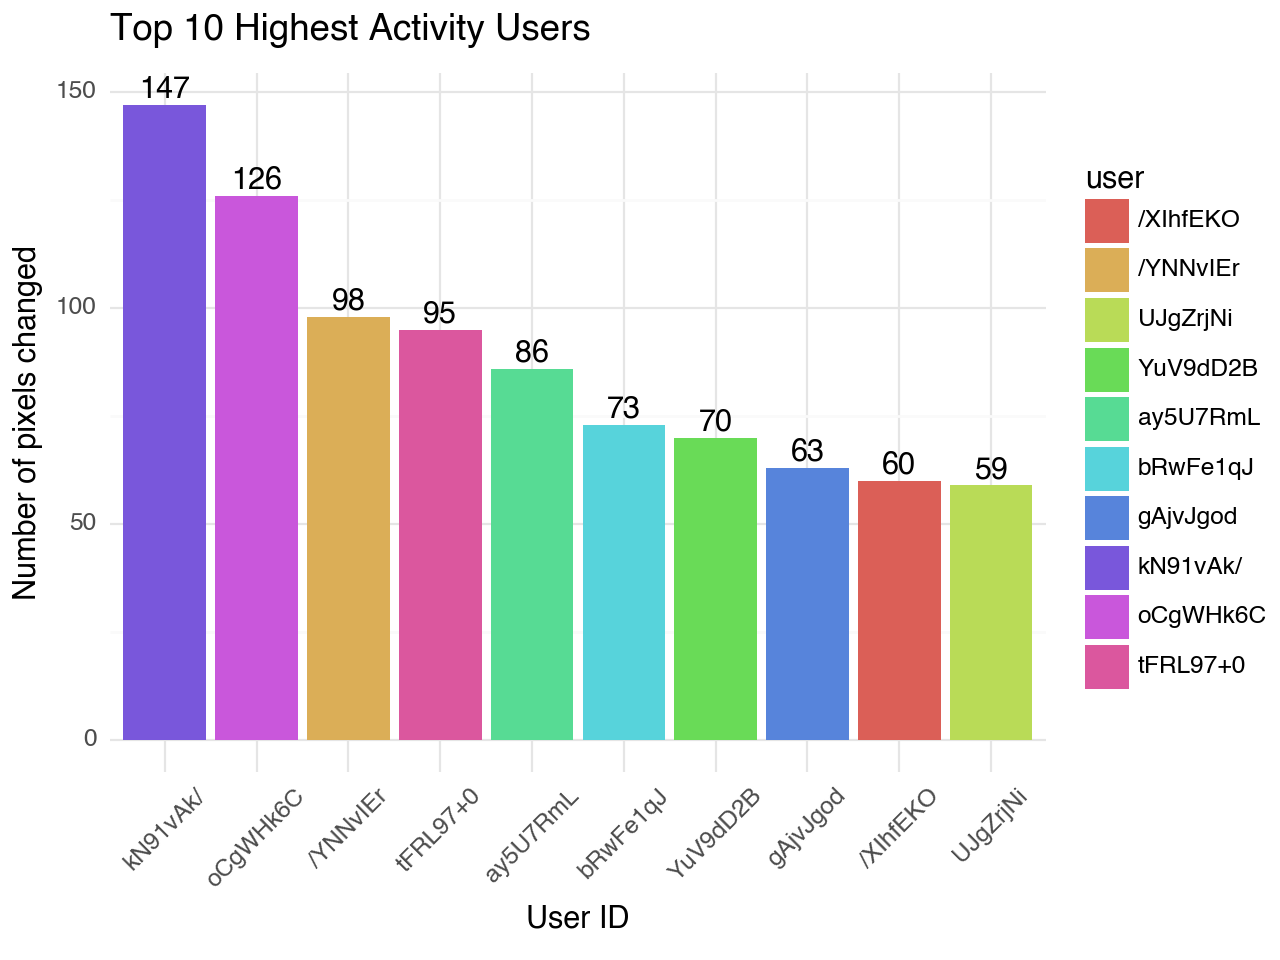

<Figure Size: (640 x 480)>

In [12]:
#plot of user and count of activity
ordered_categories2 = top10_users_df["user"]
(ggplot(top10_users_df, aes(x="user", y="count of activity", fill = "user"))
 + geom_col()
 + labs(title="Top 10 Highest Activity Users", x = "User ID", y = "Number of pixels changed")
 + scale_x_discrete(limits=ordered_categories2)
 + geom_text(aes(label='count of activity'), va='bottom')
 + theme_minimal()
 + theme(axis_text_x=element_text(angle=45))
 
)

In [13]:
#analyzing bottom 10
bottom10_users = user_activity.groupby("user").count().sort_values(by="timestamp", ascending=False).tail(10)

#turn group by into dataframe
bottom10_users_df = pd.DataFrame(bottom10_users).reset_index()
bottom10_users_df["user"] = bottom10_users_df["user"].str.extract(r'^(.{8})')
bottom10_users_df = bottom10_users_df.rename(columns={"timestamp": "count of activity"})
bottom10_users_df

,user,count of activity
0,9ffYIphq,1
1,Vl9B8CZA,1
2,Vl9BGy3y,1
3,Vl9IAuCC,1
4,Vl9UVuJp,1
5,Vl9Usvgv,1
6,Vl9oWMtF,1
7,Vl9wXVBx,1
8,VlAWHB30,1
9,TyiYClSC,1


In [14]:
avg_time_diff_bottom_users = user_timestamp[user_timestamp['user'].isin(bottom10_users_df["user"])].groupby('user')['time_diff'].mean()
avg_time_diff_bottom_users_df = pd.DataFrame(avg_time_diff_bottom_users).reset_index().sort_values(by="time_diff", ascending = True)
avg_time_diff_bottom_users_df

,user,time_diff
8,Vl9wXVBx,0.103
2,Vl9B8CZA,0.137
6,Vl9Usvgv,0.150
5,Vl9UVuJp,0.161
7,Vl9oWMtF,0.170
1,TyiYClSC,0.201
3,Vl9BGy3y,0.238
9,VlAWHB30,0.258
0,9ffYIphq,0.265
4,Vl9IAuCC,0.295


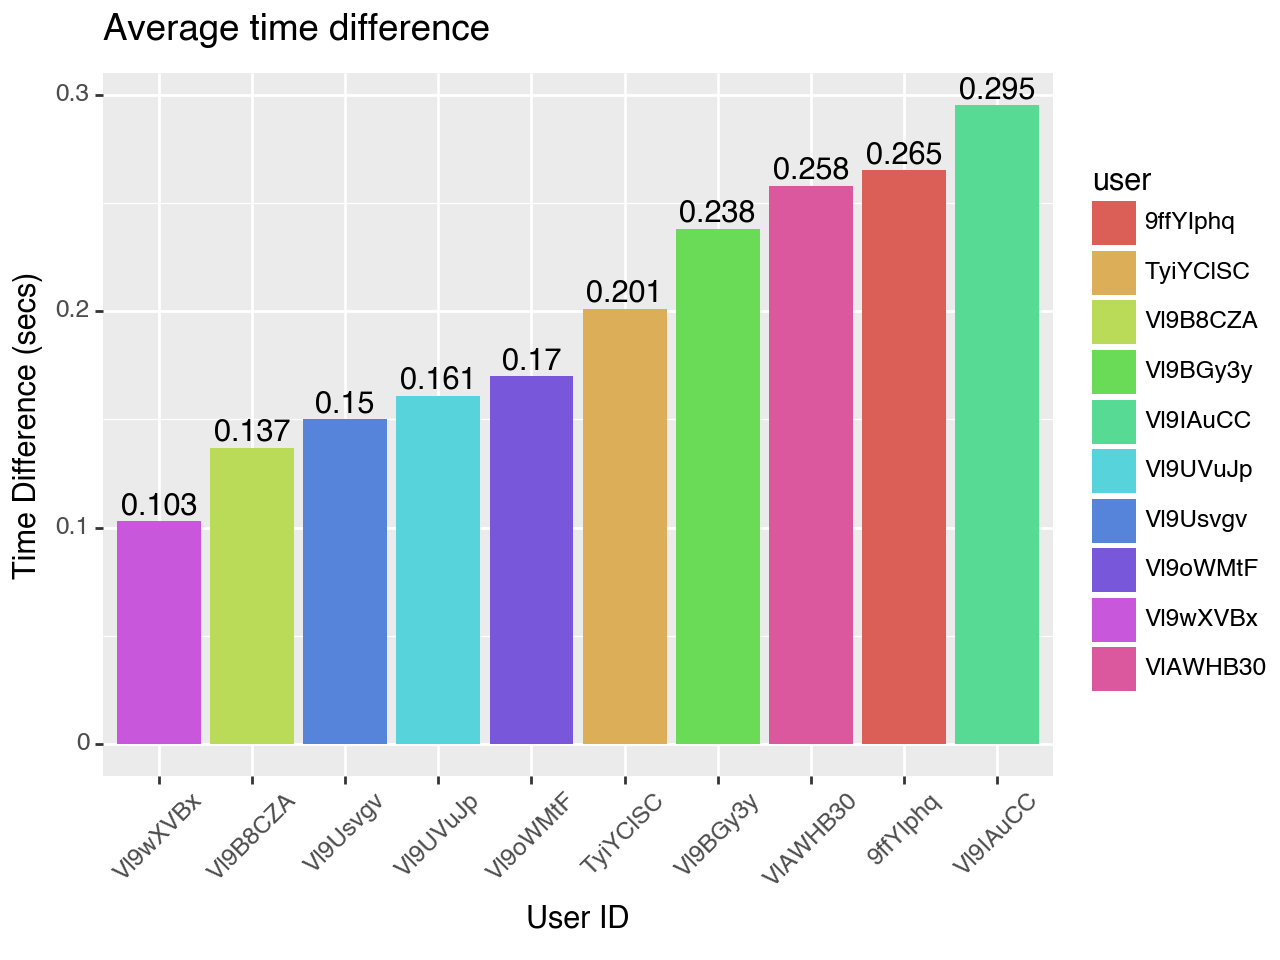

<Figure Size: (640 x 480)>

In [15]:
#plot of user and time_diff
ordered_categories = avg_time_diff_bottom_users_df["user"]
(ggplot(avg_time_diff_bottom_users_df, aes(x="user", y="time_diff", fill = "user"))
 + geom_col()
 + labs(title="Average time difference", x = "User ID", y = "Time Difference (secs)")
 + scale_x_discrete(limits=ordered_categories)
 + geom_text(aes(label='time_diff'), va='bottom')
 + theme(axis_text_x=element_text(angle=45))
)

# calculate time diff a different way

In [16]:
df.head()

,timestamp,user,coordinate,pixel_color
0,2023-07-20 13:00:26.088000+00:00,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235",#FFFFFF
1,2023-07-20 13:04:46.627000+00:00,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136",#FF4500
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311",#000000
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7",#000000
4,2023-07-20 13:04:55.302000+00:00,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498",#000000


In [17]:
user_act = df[["timestamp", "user"]]
user_act = user_act.sort_values(by="timestamp")
user_act["user"] = user_act["user"].str.extract(r'^(.{8})')

user_act.head()

,timestamp,user
0,2023-07-20 13:00:26.088000+00:00,no+8HEID
1,2023-07-20 13:04:46.627000+00:00,YF56mQAi
2,2023-07-20 13:04:50.488000+00:00,JVohwv9S
3,2023-07-20 13:04:53.186000+00:00,ZSFZbF0l
4,2023-07-20 13:04:55.302000+00:00,jgIOrksm


In [18]:
user_act_top10 = user_act[user_act["user"].isin(top10_users_df["user"])]
user_act_top10.sort_values(by=['user', 'timestamp'], inplace=True)
user_act_top10["time_diff"] = user_act_top10.groupby("user")["timestamp"].diff()
user_act_top10

/var/folders/tw/m63zl51s3894ry_dqbq6p9300000gn/T/ipykernel_11423/3294743617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/tw/m63zl51s3894ry_dqbq6p9300000gn/T/ipykernel_11423/3294743617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,timestamp,user,time_diff
11607,2023-07-20 14:02:39.883000+00:00,/XIhfEKO,NaT
22425,2023-07-20 14:41:17.284000+00:00,/XIhfEKO,0 days 00:38:37.401000
26773,2023-07-20 14:55:31.472000+00:00,/XIhfEKO,0 days 00:14:14.188000
33232,2023-07-20 15:15:58.773000+00:00,/XIhfEKO,0 days 00:20:27.301000
34131,2023-07-20 15:18:43.634000+00:00,/XIhfEKO,0 days 00:02:44.861000
...,...,...,...
2345742,2023-07-25 12:41:29.838000+00:00,tFRL97+0,0 days 00:01:52.616000
2346843,2023-07-25 12:45:08.262000+00:00,tFRL97+0,0 days 00:03:38.424000
2347603,2023-07-25 12:47:39.319000+00:00,tFRL97+0,0 days 00:02:31.057000
2347824,2023-07-25 12:48:23.745000+00:00,tFRL97+0,0 days 00:00:44.426000


In [19]:
avg_user_act_top10 = user_act_top10.groupby("user")["time_diff"].mean()
avg_user_act_top10_df = pd.DataFrame(avg_user_act_top10).reset_index()
avg_user_act_top10_df = avg_user_act_top10_df.sort_values(by="time_diff", ascending=True)
avg_user_act_top10_df

,user,time_diff
7,kN91vAk/,0 days 00:39:50.708568493
4,ay5U7RmL,0 days 00:42:10.473823529
8,oCgWHk6C,0 days 00:56:29.561744
9,tFRL97+0,0 days 01:04:45.744170212
1,/YNNvIEr,0 days 01:13:27.745917525
5,bRwFe1qJ,0 days 01:26:11.737111111
3,YuV9dD2B,0 days 01:27:39.069811594
6,gAjvJgod,0 days 01:34:46.133500
0,/XIhfEKO,0 days 02:06:11.129779661
2,UJgZrjNi,0 days 02:10:06.292672413


In [20]:
top10_users_act = pd.merge(avg_user_act_top10_df, top10_users_df, on = "user", how="left")
top10_users_act.sort_values(by="time_diff", ascending=True)

,user,time_diff,count of activity
0,kN91vAk/,0 days 00:39:50.708568493,147
1,ay5U7RmL,0 days 00:42:10.473823529,86
2,oCgWHk6C,0 days 00:56:29.561744,126
3,tFRL97+0,0 days 01:04:45.744170212,95
4,/YNNvIEr,0 days 01:13:27.745917525,98
5,bRwFe1qJ,0 days 01:26:11.737111111,73
6,YuV9dD2B,0 days 01:27:39.069811594,70
7,gAjvJgod,0 days 01:34:46.133500,63
8,/XIhfEKO,0 days 02:06:11.129779661,60
9,UJgZrjNi,0 days 02:10:06.292672413,59


/Users/conniechou/anaconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 76 rows containing missing values.


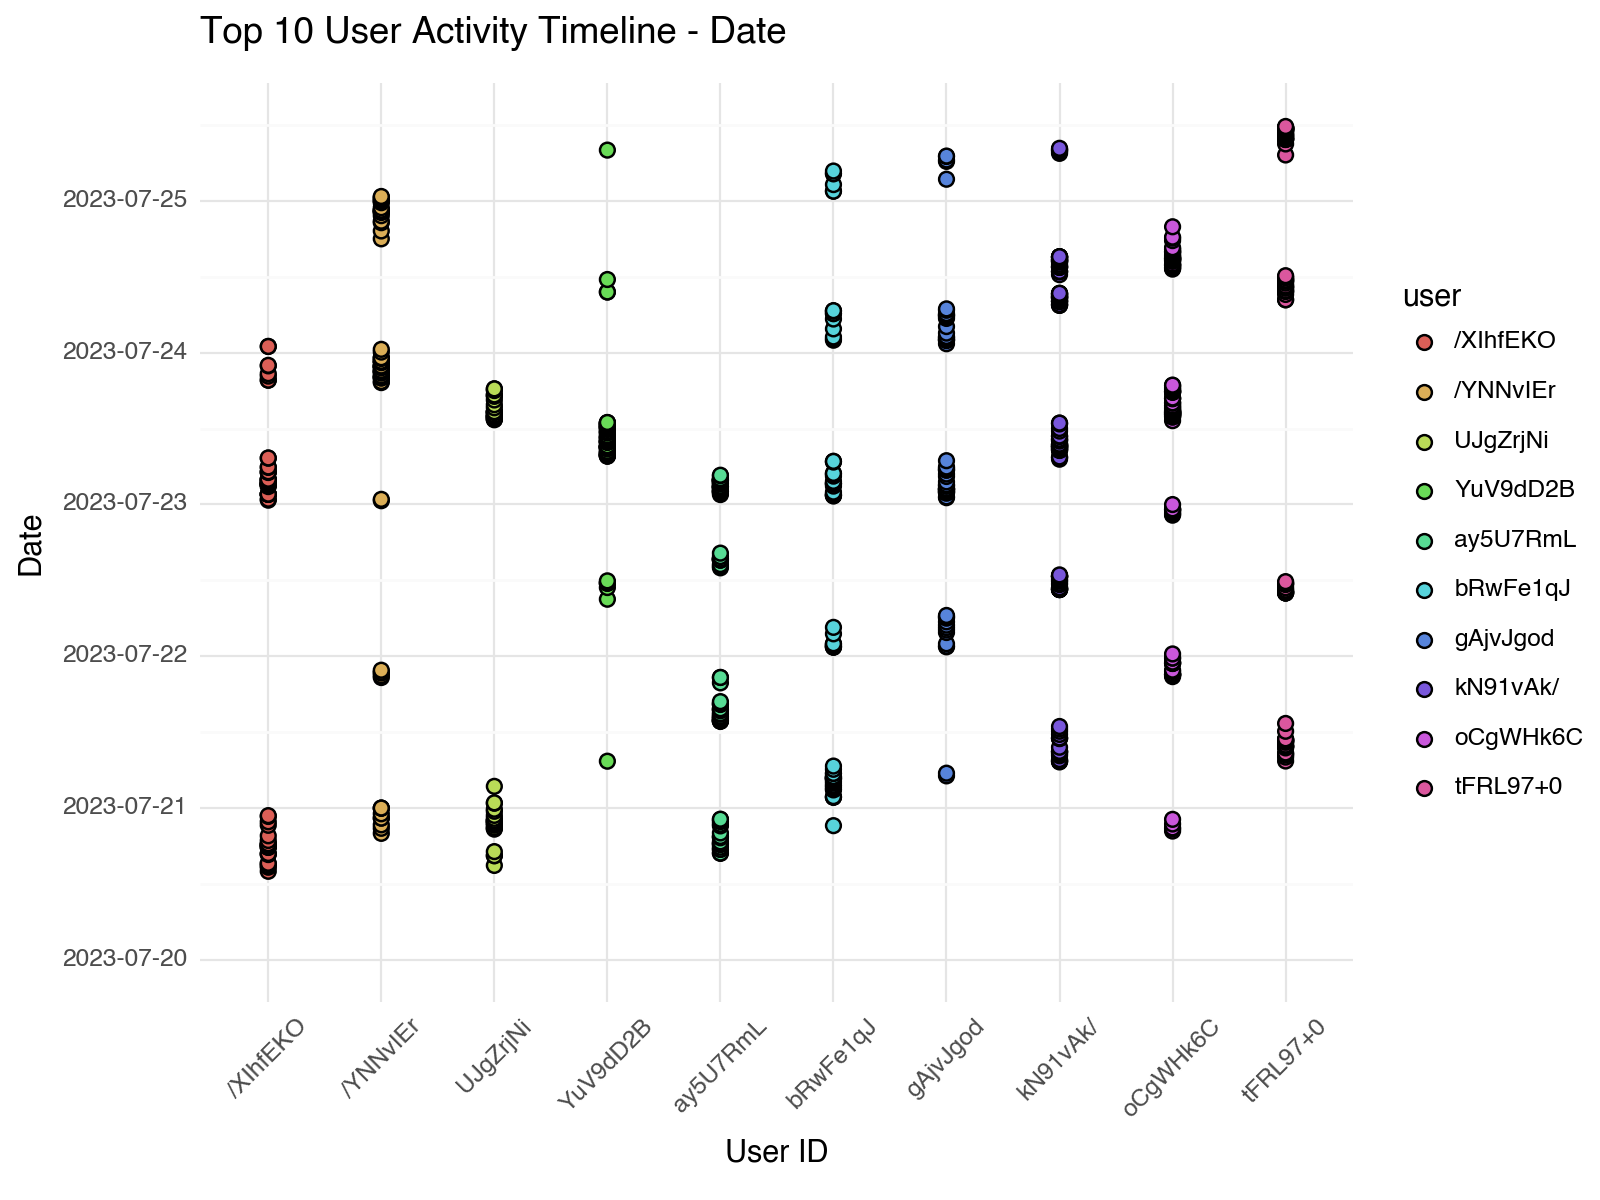

<Figure Size: (800 x 600)>

In [21]:
#top 10 users as x axis, y axis is the datetime, create a scatterplot of each time they put a pixel down
(ggplot(user_act_top10, aes(x="user", y="timestamp", fill="user"))
 + geom_point(size=2.5)
 + labs(title="Top 10 User Activity Timeline - Date", x = "User ID", y = "Date")
 + theme_minimal()
 + theme(axis_text_x=element_text(angle=45))
 + theme(figure_size=(8,6))
 + scale_y_datetime(limits=(pd.Timestamp("2023-07-20 00:00:00"), pd.Timestamp("2023-07-25 11:59:59")))  # Set y-axis limits manually
)

In [22]:
user_act_top10["time_in_minutes"] = user_act_top10["timestamp"].dt.hour * 60 + user_act_top10["timestamp"].dt.minute
user_act_top10

/var/folders/tw/m63zl51s3894ry_dqbq6p9300000gn/T/ipykernel_11423/3801249273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,timestamp,user,time_diff,time_in_minutes
11607,2023-07-20 14:02:39.883000+00:00,/XIhfEKO,NaT,842
22425,2023-07-20 14:41:17.284000+00:00,/XIhfEKO,0 days 00:38:37.401000,881
26773,2023-07-20 14:55:31.472000+00:00,/XIhfEKO,0 days 00:14:14.188000,895
33232,2023-07-20 15:15:58.773000+00:00,/XIhfEKO,0 days 00:20:27.301000,915
34131,2023-07-20 15:18:43.634000+00:00,/XIhfEKO,0 days 00:02:44.861000,918
...,...,...,...,...
2345742,2023-07-25 12:41:29.838000+00:00,tFRL97+0,0 days 00:01:52.616000,761
2346843,2023-07-25 12:45:08.262000+00:00,tFRL97+0,0 days 00:03:38.424000,765
2347603,2023-07-25 12:47:39.319000+00:00,tFRL97+0,0 days 00:02:31.057000,767
2347824,2023-07-25 12:48:23.745000+00:00,tFRL97+0,0 days 00:00:44.426000,768


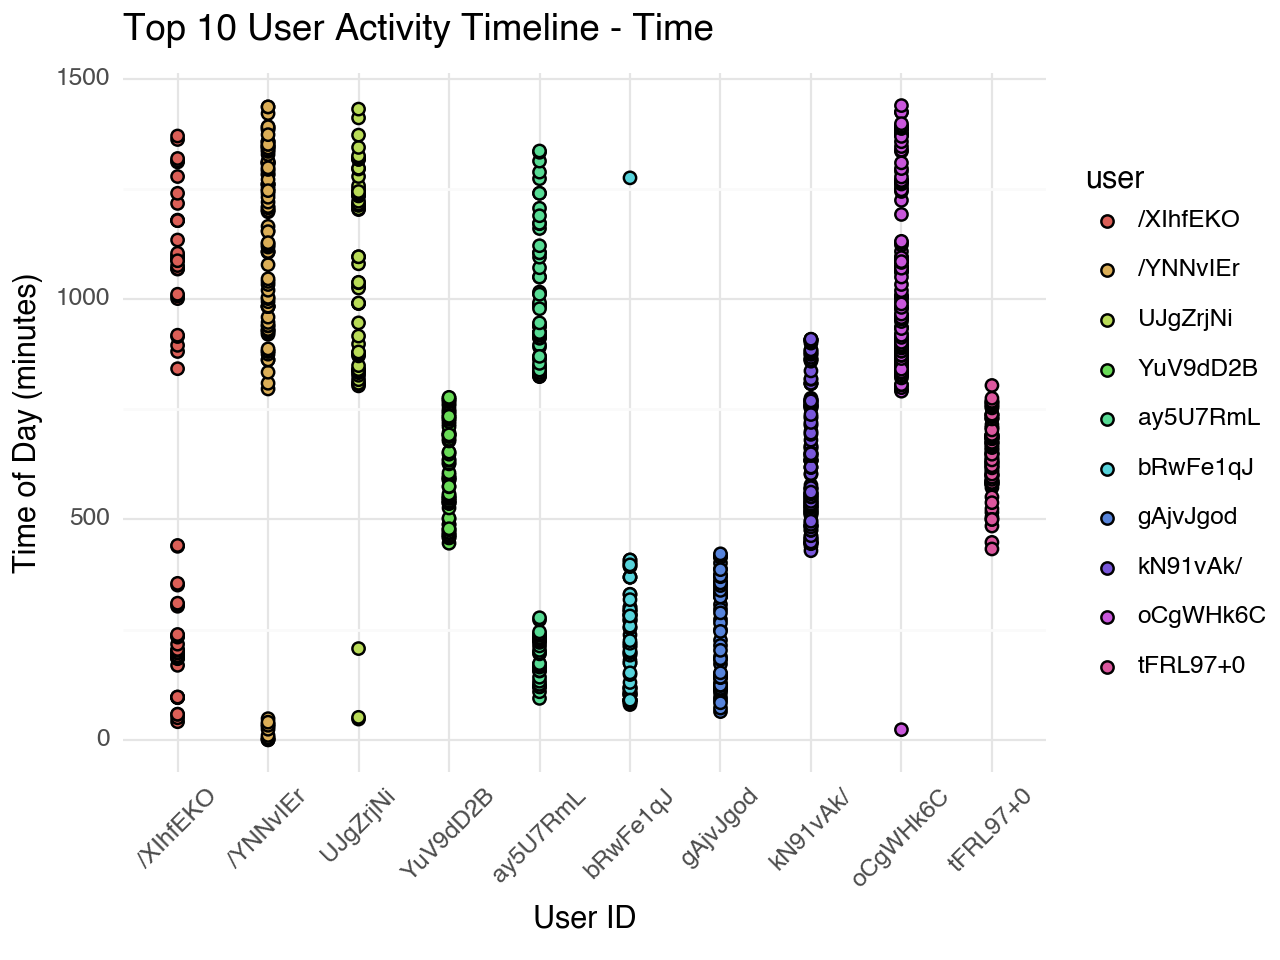

<Figure Size: (640 x 480)>

In [33]:
#top 10 users as x axis, y axis is the datetime, create a scatterplot of each time they put a pixel down
(ggplot(user_act_top10, aes(x="user", y="time_in_minutes", fill="user"))
 + geom_point(size=2)
 + labs(title="Top 10 User Activity Timeline - Time", x = "User ID", y = "Time of Day (minutes)")
 + theme_minimal()
 + theme(axis_text_x=element_text(angle=45))
 + scale_y_continuous(limits=(0, 1440))
)

In [24]:
user_act_top10["date"] = user_act_top10["timestamp"].dt.date
user_act_top10

/var/folders/tw/m63zl51s3894ry_dqbq6p9300000gn/T/ipykernel_11423/3580442545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,timestamp,user,time_diff,time_in_minutes,date
11607,2023-07-20 14:02:39.883000+00:00,/XIhfEKO,NaT,842,2023-07-20
22425,2023-07-20 14:41:17.284000+00:00,/XIhfEKO,0 days 00:38:37.401000,881,2023-07-20
26773,2023-07-20 14:55:31.472000+00:00,/XIhfEKO,0 days 00:14:14.188000,895,2023-07-20
33232,2023-07-20 15:15:58.773000+00:00,/XIhfEKO,0 days 00:20:27.301000,915,2023-07-20
34131,2023-07-20 15:18:43.634000+00:00,/XIhfEKO,0 days 00:02:44.861000,918,2023-07-20
...,...,...,...,...,...
2345742,2023-07-25 12:41:29.838000+00:00,tFRL97+0,0 days 00:01:52.616000,761,2023-07-25
2346843,2023-07-25 12:45:08.262000+00:00,tFRL97+0,0 days 00:03:38.424000,765,2023-07-25
2347603,2023-07-25 12:47:39.319000+00:00,tFRL97+0,0 days 00:02:31.057000,767,2023-07-25
2347824,2023-07-25 12:48:23.745000+00:00,tFRL97+0,0 days 00:00:44.426000,768,2023-07-25


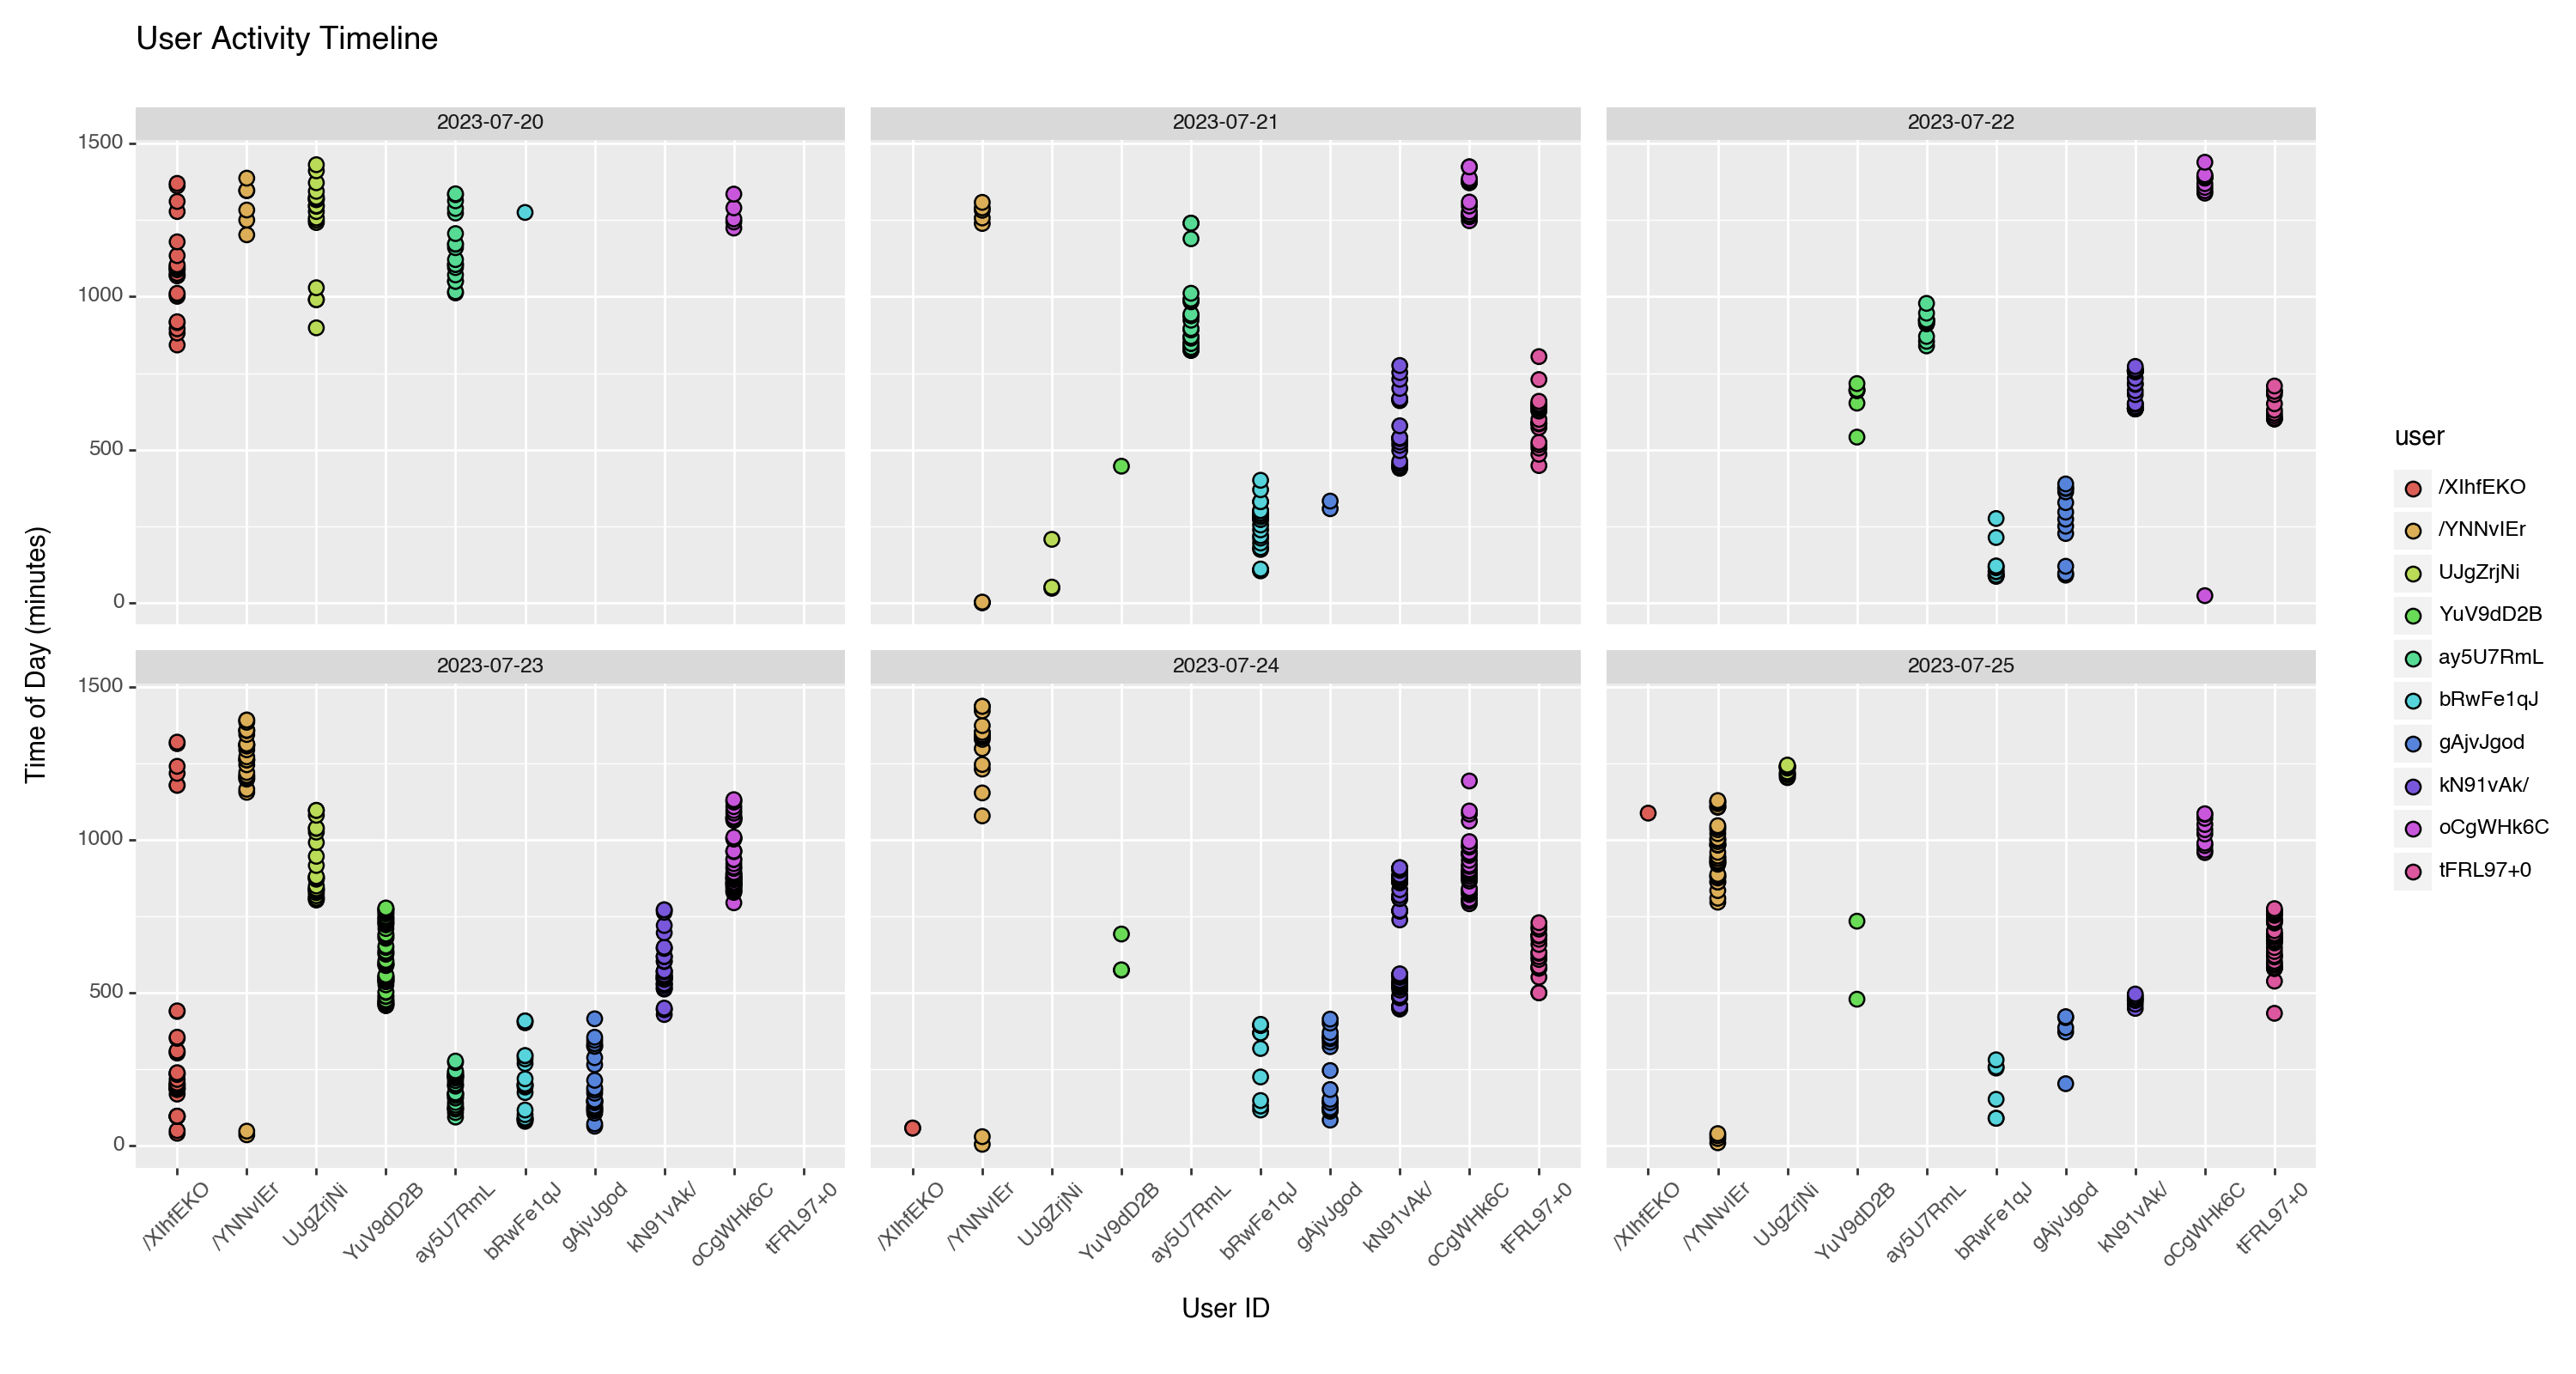

<Figure Size: (1500 x 800)>

In [25]:
#x axis = day, y axis is minutes of the day
(ggplot(user_act_top10, aes(x="user", y="time_in_minutes", fill="user"))
 + geom_point(size=3)
 + labs(title="User Activity Timeline", x = "User ID", y = "Time of Day (minutes)")
 + facet_wrap("date")
 + theme(axis_text_x=element_text(angle=45))
 + theme(figure_size=(15,8))
)

# least active users

In [39]:
user_coor_df = df[["user", "coordinate"]]
user_coor_df

,user,coordinate
0,no+8HEIDjbdx7/LxH9Xr+h4lyoar0MRTYugWKrGdQOg7dF...,"-199,-235"
1,YF56mQAiwsAJZWzgMKsdbV9/C/BX6TrYCG5tI0RWei5gMB...,"-282,136"
2,JVohwv9S68P/w6g43UGQ2cIYfQRDbHGz6j+e4as892QiRb...,"4,311"
3,ZSFZbF0lkStMHMvpxTc9g1+JpjHXDHBQVdFn8wo+9gGCyX...,"231,7"
4,jgIOrksmd9jjetEZzqaU6mmKrIJwng/c/NHdZKvtqNZZ1A...,"-492,-498"
...,...,...
2644509,XWx0y4wBBFLD1M/8MVKWKFrSdWWlhp7wEgFwadygHCzM59...,"0,0"
2644510,PVz40760LDe7VH2YhQ4BbuDFQsufbsT5lA+PnZ76RbCVbQ...,"-744,557"
2644511,hyDDfQSNp9CwyoHQEUNTgCybdV9jluz6yUbnYzsBMXkdFG...,"12,4"
2644512,sxoBQbvYC4sT4BtBdM10HO/NyDhWnAF8DJrkQp/ovY7nYE...,"17,9"


In [51]:
users = user_coor_df.groupby("user").count().sort_values(by="coordinate", ascending=True)
users

,coordinate
user,
TyiHrmr7GjZA36OuF+foxtxDgN3yhSptUIf/8qWEZrUKxeX3nd7DGEBOltLeWsniPtkOd4IROYgBIQDYiRSVGQ==,1
SAj2qxWJQRBs6XVqtXvBOYMJiO73PzY4sRaxhP/j9ytTz9658gbs60U6JjTU2GkPopkCpmB+siLLCWF8vmWVRA==,1
SAj7ME9dghSFF4v/lPbC+AJfJdz+XUJ5/WMoM8mEJY2HukMjfJLckPeSIAtIMkEiKohBrGvjPOnsCTxk8B904w==,1
SAjAJMxTchCNNvHxfNG8GUJ2AtDbRojKpEwMJBOi26dc+PlmVuyYfxBzguahWTt7MH0Bqp7cLG7IDtJbswToZw==,1
SAjVJwfsahqo5TcuMIOePCYILC7UB70xUd2gY9vsR75MLfNfC0DmUhQhiFRGQMQLkrwh0EFJcpN/zZmrpuMu+A==,1
...,...
ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD1QSn1gerRGhCtGMqewNZKwpcF/LyWn61YF2r3ZDQ==,86
tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V9fPY8H5YDHp7HiGFCPp2WkONaXd0ippv87shGmcQ==,95
/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi6szjAkwAeHn2cSLimDx6c8/W/4YKYoSr0fKZXBFw==,98


In [52]:
users_df = pd.DataFrame(users).reset_index()
users_df

,user,coordinate
0,TyiHrmr7GjZA36OuF+foxtxDgN3yhSptUIf/8qWEZrUKxe...,1
1,SAj2qxWJQRBs6XVqtXvBOYMJiO73PzY4sRaxhP/j9ytTz9...,1
2,SAj7ME9dghSFF4v/lPbC+AJfJdz+XUJ5/WMoM8mEJY2Huk...,1
3,SAjAJMxTchCNNvHxfNG8GUJ2AtDbRojKpEwMJBOi26dc+P...,1
4,SAjVJwfsahqo5TcuMIOePCYILC7UB70xUd2gY9vsR75MLf...,1
...,...,...
1549813,ay5U7RmL4QAj/p06ODdMbVh7lc1LqvfZHMFaU6BNIzcIVD...,86
1549814,tFRL97+0mluUiLf6lR3qQnp4pa/pXVBJ6VN0eXBdExFt0V...,95
1549815,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,98
1549816,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,126


In [43]:
users_less_3 = low_active_df[low_active_df["coordinate"] <= 3]
users_less_3

,user,coordinate
0,TyiHrmr7GjZA36OuF+foxtxDgN3yhSptUIf/8qWEZrUKxe...,1
1,SAj2qxWJQRBs6XVqtXvBOYMJiO73PzY4sRaxhP/j9ytTz9...,1
2,SAj7ME9dghSFF4v/lPbC+AJfJdz+XUJ5/WMoM8mEJY2Huk...,1
3,SAjAJMxTchCNNvHxfNG8GUJ2AtDbRojKpEwMJBOi26dc+P...,1
4,SAjVJwfsahqo5TcuMIOePCYILC7UB70xUd2gY9vsR75MLf...,1
...,...,...
1425834,s7UCNGnZxQlHl5YT9kFNFjmQNXHbcD+FtPI/q+3wz8Lwxx...,3
1425835,LlR8JvWn4ZRZjismmQg9NXak64XG882OgfSr78cyaxuT2U...,3
1425836,hRkdwIcUFpc7Aj5TA+QRUzISLaGmhPZ9xKumni/FyWFDN9...,3
1425837,dzeLqxRXgILoeLMQj81IRBsYC9BJap6C3K6ulZpFjouk0l...,3


In [53]:
users_more_96 = low_active_df[low_active_df["coordinate"] >= 96]
users_more_96

,user,coordinate
1549815,/YNNvIErSA5atGXTER7fymCxIY/9xvunlE0Kisx+Cbppoi...,98
1549816,oCgWHk6Cfsa52vAOJBPqBDyKN+OH3Obx0/bXBShVJD/ADN...,126
1549817,kN91vAk/cntIE4qOgH6b06ZWInymLuAez37ZA5gv+WfT8C...,147
